In [1]:
# Librerias 

import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Data
df = pd.read_csv('data_aula04.csv', header=0, sep=';')
df.shape



(677, 5)

In [7]:

df.describe()

,var1,var2,var3,var4,var5
count,677.000000,677.000000,677.000000,677.000000,6.770000e+02
mean,2.041359,0.278418,3.743123,33.298154,1.166940e+05
std,0.790889,12.799350,0.324061,25.648299,4.204340e+05
min,0.000000,-163.528280,2.488372,0.850000,8.000000e+02
25%,2.000000,-0.002633,3.588958,12.680000,1.081600e+04
50%,2.000000,0.000000,3.687137,26.650000,2.016000e+04
75%,2.000000,0.004437,3.855922,49.820000,5.760000e+04
max,6.000000,164.856576,5.175506,148.130000,6.000000e+06


In [9]:
df.dtypes

var1      int64
var2    float64
var3    float64
var4    float64
var5    float64
dtype: object

In [13]:
df.isna().sum()

var1    0
var2    0
var3    0
var4    0
var5    0
dtype: int64

<Figure size 640x480 with 0 Axes>

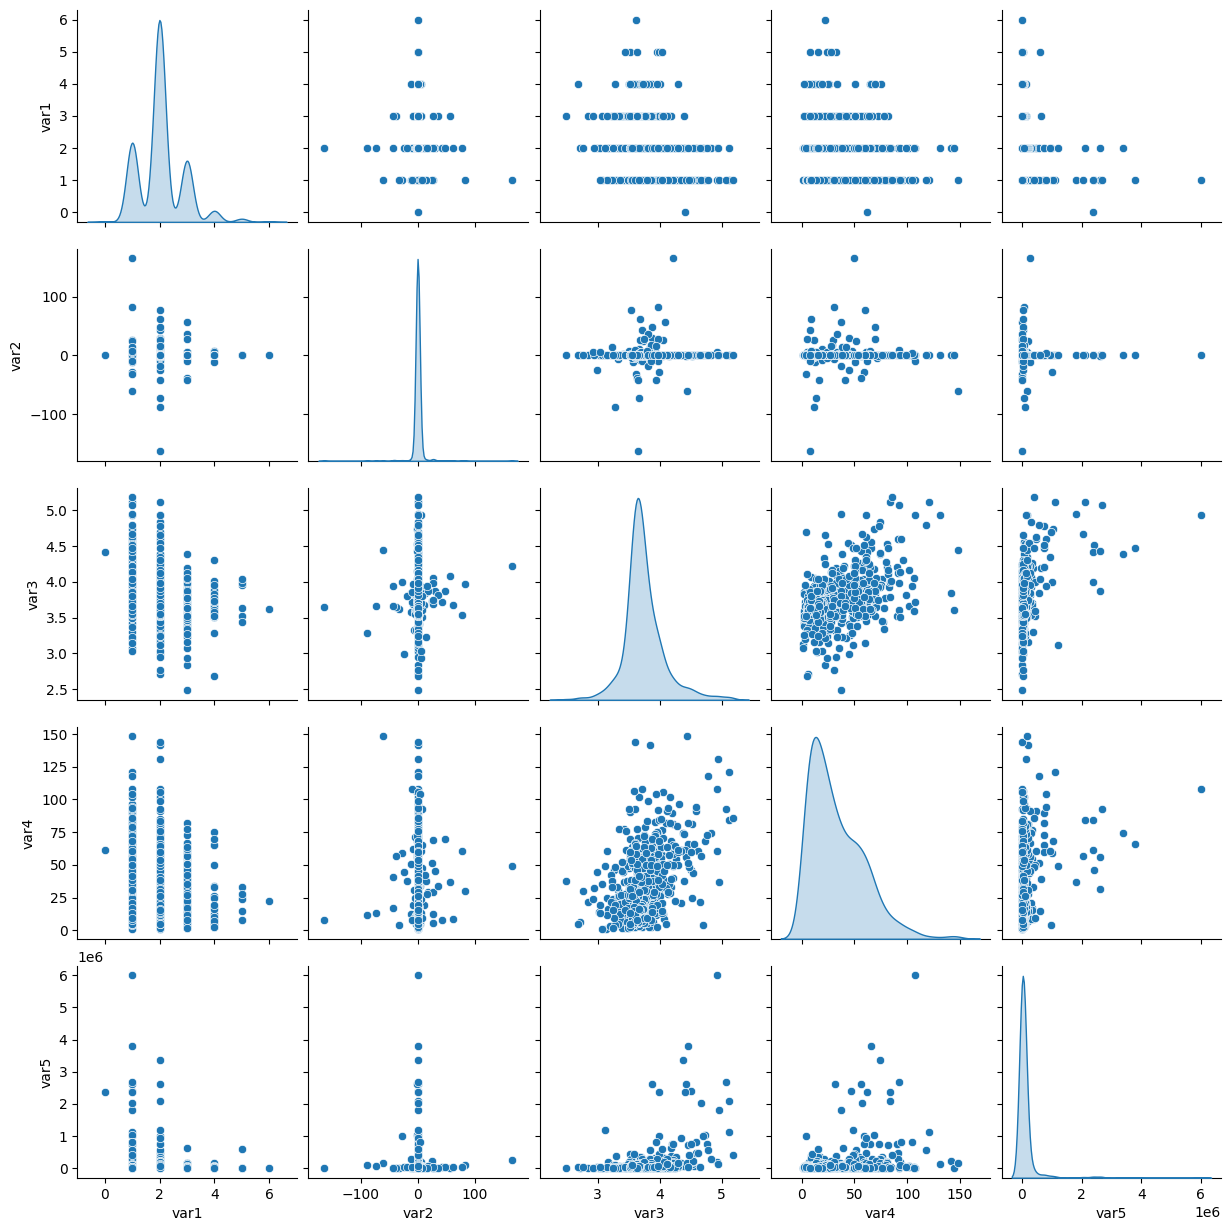

In [14]:

plt.figure()
sns.pairplot(df, diag_kind='kde')
plt.show()

In [5]:
# Posibles distribuciones
dist_names = ['norm', 'exponweib', 'weibull_max', 'weibull_min', 'pareto', 'genextreme']

In [ ]:
# Funcion



In [ ]:
# Funcion Alan 
def get_best_distribution(data, dist_names):
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)
        params[dist_name] = param
        
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print('p value for ' + dist_name + ' = ' + str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print('\nBest fitting distribution: ' + str(best_dist))
    print('Best p value: ' + str(best_p))
    print('Parameters for the best fit: ' + str(params[best_dist]))

    return best_dist, best_p, params[best_dist]